# Analyzing Player Performances

In [1]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_rows', None)  

In [2]:
#Combining All Offensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Offensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedOffensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [3]:
#Combining All Defensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Defensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedDefensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [4]:
#Combining All Passing Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Passing*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedPassingPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [5]:
#Combining All Summary Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Summary*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedSummaryPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [103]:
combinedOffensivePlayerDataframe.head()

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Arjen Robben,Bayern Munich,26,"M(CLR),FW",18,1779,16,6,3.4,1.8,4,2.2,0.3,2.1,-,8.18,Bundesliga,2009
1,Stefan Kießling,Bayer Leverkusen,26,FW,33,2924,21,5,3,1.6,1.1,3.1,1.8,2.2,-,7.79,Bundesliga,2009
2,Zvjezdan Misimovic,Wolfsburg,28,"AM(C),FW",31,2768,10,13,2.4,3.3,1.5,2.1,0.3,3.1,-,7.74,Bundesliga,2009
3,Edin Dzeko,Wolfsburg,24,FW,33,3003,22,7,4.5,1.1,2,1.7,1.6,2.9,-,7.73,Bundesliga,2009
4,Claudio Pizarro,Werder Bremen,31,"AM(C),FW",23,2130,16,2,2.6,1.3,1.2,1.2,1.4,3.1,-,7.63,Bundesliga,2009


In [6]:
#combining all the DFs'

combinedPlayerDataframe = pd.concat([combinedOffensivePlayerDataframe, combinedDefensivePlayerDataframe, combinedPassingPlayerDataframe, combinedSummaryPlayerDataframe], axis=1)

combinedPlayerDataframe = combinedPlayerDataframe.loc[:,~combinedPlayerDataframe.columns.duplicated()]

#Removing all the goal keepers to test whether it improves the accuracy of the model.
combinedFieldPlayersDf = combinedPlayerDataframe[combinedPlayerDataframe.Position != 'GK']

#Removing field players who have played less than 10 matches
#combinedProperFieldPlayersDf = combinedFieldPlayersDf[~(combinedFieldPlayersDf['Apps'] < 8)]  

## Testing Regression

In [105]:
#list column names
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedSummaryPlayerDataframe.columns)] # 59% 
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedPlayerDataframe.columns)] # 75%
[(f"column {i+1} : {column}") for i, column in enumerate(combinedFieldPlayersDf.columns)] # 80%
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedProperFieldPlayersDf.columns)] 

['column 1 : Name',
 'column 2 : Team',
 'column 3 : Age',
 'column 4 : Position',
 'column 5 : Apps',
 'column 6 : Minutes',
 'column 7 : Total goals',
 'column 8 : Total Assists',
 'column 9 : Shots per game',
 'column 10 : Key passes per game',
 'column 11 : Dribbles per game',
 'column 12 : Fouled per game',
 'column 13 : Offsides per game',
 'column 14 : Dispossessed per game',
 'column 15 : Bad control per game',
 'column 16 : Rating',
 'column 17 : League',
 'column 18 : Season',
 'column 19 : Tackles per game',
 'column 20 : Interceptions per game',
 'column 21 : Fouls per game',
 'column 22 : Clearances per game',
 'column 23 : Dribbled past per game',
 'column 24 : Outfield blocks per game',
 'column 25 : Own goals',
 'column 26 : Passes per game',
 'column 27 : Pass success percentage',
 'column 28 : Crosses per game',
 'column 29 : Long balls per game',
 'column 30 : Through balls per game',
 'column 31 : Total Goals',
 'column 32 : Yellow cards',
 'column 33 : Red cards',


In [106]:
#Remove unwanted columns
#finalDf = combinedSummaryPlayerDataframe.drop(["Team", "Position", "League", "Season"], axis = 1)
finalDf = combinedFieldPlayersDf.drop(["Team", "Position", "League", "Season"], axis = 1)
# finalDf = combinedFieldPlayersDf
#finalDf = combinedProperFieldPlayersDf.drop(["Team", "Position", "League", "Season"], axis = 1)

In [107]:
#replace - fields with 0
finalDf = finalDf.replace('-', 0)

In [108]:
#checks if duplicates exists
finalDf.duplicated().any()

False

In [109]:
#removes NaN values
# finalDf = finalDf.dropna()
finalDf = finalDf.fillna(0)

In [110]:
#check if null value exitst
finalDf.isnull().any()

Name                        False
Age                         False
Apps                        False
Minutes                     False
Total goals                 False
Total Assists               False
Shots per game              False
Key passes per game         False
Dribbles per game           False
Fouled per game             False
Offsides per game           False
Dispossessed per game       False
Bad control per game        False
Rating                      False
Tackles per game            False
Interceptions per game      False
Fouls per game              False
Clearances per game         False
Dribbled past per game      False
Outfield blocks per game    False
Own goals                   False
Passes per game             False
Pass success percentage     False
Crosses per game            False
Long balls per game         False
Through balls per game      False
Total Goals                 False
Yellow cards                False
Red cards                   False
Aerials won pe

In [111]:
#returns DF shape
finalDf.shape

(27918, 31)

In [112]:
#check column data types
finalDf.dtypes

Name                         object
Age                           int64
Apps                          int64
Minutes                       int64
Total goals                  object
Total Assists                object
Shots per game               object
Key passes per game          object
Dribbles per game            object
Fouled per game              object
Offsides per game            object
Dispossessed per game        object
Bad control per game         object
Rating                      float64
Tackles per game             object
Interceptions per game       object
Fouls per game               object
Clearances per game          object
Dribbled past per game       object
Outfield blocks per game     object
Own goals                    object
Passes per game              object
Pass success percentage      object
Crosses per game             object
Long balls per game          object
Through balls per game       object
Total Goals                  object
Yellow cards                

In [113]:
#replace Name column with dummy data for each different player names
finalDf = pd.get_dummies(finalDf, columns=["Name"])
# finalDf = pd.get_dummies(finalDf, columns=["Name", "Team", "Position", "League", "Season"])
finalDf.dtypes

Age                     int64
Apps                    int64
Minutes                 int64
Total goals            object
Total Assists          object
                        ...  
Name_Óscar Serrano      uint8
Name_Óscar Trejo        uint8
Name_Ömer Toprak        uint8
Name_Özkan Yildirim     uint8
Name_Ümit Korkmaz       uint8
Length: 8605, dtype: object

In [114]:
#convert object data types to flot (except for names)
cols = finalDf.select_dtypes(exclude=['uint8']).columns
finalDf[cols] = finalDf[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

finalDf.dtypes

Age                    float32
Apps                   float32
Minutes                float32
Total goals            float32
Total Assists          float32
                        ...   
Name_Óscar Serrano       uint8
Name_Óscar Trejo         uint8
Name_Ömer Toprak         uint8
Name_Özkan Yildirim      uint8
Name_Ümit Korkmaz        uint8
Length: 8605, dtype: object

In [115]:
finalDf.head()

,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,...,Name_Óscar Díaz,Name_Óscar Melendo,Name_Óscar Plano,Name_Óscar Rodríguez,Name_Óscar Romero,Name_Óscar Serrano,Name_Óscar Trejo,Name_Ömer Toprak,Name_Özkan Yildirim,Name_Ümit Korkmaz
0,26.0,18.0,1779.0,16.0,6.0,3.4,1.8,4.0,2.2,0.3,...,0,0,0,0,0,0,0,0,0,0
1,26.0,33.0,2924.0,21.0,5.0,3.0,1.6,1.1,3.1,1.8,...,0,0,0,0,0,0,0,0,0,0
2,28.0,31.0,2768.0,10.0,13.0,2.4,3.3,1.5,2.1,0.3,...,0,0,0,0,0,0,0,0,0,0
3,24.0,33.0,3003.0,22.0,7.0,4.5,1.1,2.0,1.7,1.6,...,0,0,0,0,0,0,0,0,0,0
4,31.0,23.0,2130.0,16.0,2.0,2.6,1.3,1.2,1.2,1.4,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Creating X, y datasets (X = everything except rating, y = just the rating)
X = finalDf.drop(['Rating'], axis = 1)
y = np.array(finalDf['Rating'])
y

array([8.18, 7.79, 7.74, ..., 5.74, 5.73, 5.42], dtype=float32)

In [117]:
#Splitting into training & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [118]:
#Training with different regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


dtm = DecisionTreeRegressor()
scoring = 'r2'
y_pred = dtm.fit(X_train,y_train).predict(X_train)
results = model_selection.cross_val_score(dtm, X_test, y_test, cv=kfold, scoring=scoring)
print("DecisionTreeRegressor")
print(results.mean(), results.std())

rfm = RandomForestRegressor()
scoring = 'r2'
y_pred = rfm.fit(X_train,y_train).predict(X_train)
results = model_selection.cross_val_score(rfm, X_test, y_test, cv=kfold, scoring=scoring)
print("RandomForestRegressor")
print(results.mean(), results.std())

DecisionTreeRegressor
0.6248879235879169 0.026395466855891656


C:\Users\Suwadith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor
0.7963076292077054 0.017716823373362573


## Testing Multivariate Time Series

In [7]:
columns = list(combinedFieldPlayersDf.columns.values)
columns.remove('Season')
columns.remove('Name')
columns

['Team',
 'Age',
 'Position',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'Rating',
 'League',
 'Tackles per game',
 'Interceptions per game',
 'Fouls per game',
 'Clearances per game',
 'Dribbled past per game',
 'Outfield blocks per game',
 'Own goals',
 'Passes per game',
 'Pass success percentage',
 'Crosses per game',
 'Long balls per game',
 'Through balls per game',
 'Total Goals',
 'Yellow cards',
 'Red cards',
 'Aerials won per game',
 'Man of the match']

In [8]:
#Switching the pivot table structure to a different form to analyse time series data 
seasonNameCombinedFieldPlayerDF = combinedFieldPlayersDf.pivot_table(index=['Season'], columns=['Name'], values=columns, aggfunc='first').reset_index()

seasonNameCombinedFieldPlayerDF.head()

Season Aerials won per game                                       \
Name             Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0      2009                  NaN          2.4        0.2            -   
1      2010                  NaN          2.8        0.2          0.1   
2      2011                  NaN          1.8        0.6          0.2   
3      2012                  NaN          2.9        0.6          0.2   
4      2013                  NaN          3.2        1.1          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN            -             1           NaN        NaN   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            -  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8              -          NaN  
4              NaN           4           5              -          NaN  

[5 rows x 282976 columns]

In [9]:
#replace - fields with 0
seasonNameCombinedFieldPlayerDF = seasonNameCombinedFieldPlayerDF.replace('-', 0)

In [10]:
#checks if duplicates exists
seasonNameCombinedFieldPlayerDF.duplicated().any()

False

In [11]:
#removes NaN values
# seasonNameCombinedFieldPlayerDF = seasonNameCombinedFieldPlayerDF.fillna(0)

In [12]:
#check if null value exitst
seasonNameCombinedFieldPlayerDF.isnull().any()

                      Name           
Season                                   False
Aerials won per game  Aaron Cresswell     True
                      Aaron Hughes        True
                      Aaron Hunt          True
                      Aaron Lennon       False
                                         ...  
Yellow cards          Óscar Serrano       True
                      Óscar Trejo         True
                      Ömer Toprak        False
                      Özkan Yildirim      True
                      Ümit Korkmaz        True
Length: 282976, dtype: bool

In [13]:
seasonNameCombinedFieldPlayerDF

Season Aerials won per game                                       \
Name             Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0      2009                  NaN          2.4        0.2            0   
1      2010                  NaN          2.8        0.2          0.1   
2      2011                  NaN          1.8        0.6          0.2   
3      2012                  NaN          2.9        0.6          0.2   
4      2013                  NaN          3.2        1.1          0.1   
5      2014                  1.4          NaN        0.4          0.2   
6      2015                  1.1          NaN        1.1            0   
7      2016                  1.4          NaN        0.6            0   
8      2017                  1.6          NaN        0.7          0.5   
9      2018                  1.3          NaN        NaN          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN          0.0             1           NaN        NaN   
5                 NaN          NaN           1.4           NaN        NaN   
6                 NaN          NaN           1.3           NaN        NaN   
7                 0.8          NaN           1.3           NaN        NaN   
8                 NaN          NaN           1.6           NaN        0.9   
9                 1.2          NaN           2.2           NaN        0.5   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   
5     ...          NaN           NaN         NaN             NaN          NaN   
6     ...          NaN           NaN         NaN             NaN          NaN   
7     ...          NaN             0         NaN             NaN            3   
8     ...          NaN             1         NaN             NaN            0   
9     ...          NaN             3           8               5          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            0  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8            0.0          NaN  
4              NaN           4           5            0.0          NaN  
5              NaN           4          10            0.0          NaN  
6              NaN           6           2            0.0          NaN  
7              NaN           4           6            NaN          NaN  
8              NaN         NaN           1            NaN          NaN  
9              NaN           5           0            NaN          NaN  

[10 rows x 282976 columns]

In [14]:
seasonNameCombinedFieldPlayerDF.dtypes

                      Name           
Season                                    object
Aerials won per game  Aaron Cresswell     object
                      Aaron Hughes        object
                      Aaron Hunt          object
                      Aaron Lennon        object
                                          ...   
Yellow cards          Óscar Serrano       object
                      Óscar Trejo         object
                      Ömer Toprak         object
                      Özkan Yildirim     float64
                      Ümit Korkmaz        object
Length: 282976, dtype: object

In [15]:
seasonNameCombinedFieldPlayerDF['Season'] = pd.to_datetime(seasonNameCombinedFieldPlayerDF.Season , format = '%Y')
data = seasonNameCombinedFieldPlayerDF.drop(['Season'], axis=1)
data.index = seasonNameCombinedFieldPlayerDF.Season

C:\Users\Suwadith\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [16]:
seasonNameCombinedFieldPlayerDF

Season Aerials won per game                                       \
Name                 Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0    2009-01-01                  NaN          2.4        0.2            0   
1    2010-01-01                  NaN          2.8        0.2          0.1   
2    2011-01-01                  NaN          1.8        0.6          0.2   
3    2012-01-01                  NaN          2.9        0.6          0.2   
4    2013-01-01                  NaN          3.2        1.1          0.1   
5    2014-01-01                  1.4          NaN        0.4          0.2   
6    2015-01-01                  1.1          NaN        1.1            0   
7    2016-01-01                  1.4          NaN        0.6            0   
8    2017-01-01                  1.6          NaN        0.7          0.5   
9    2018-01-01                  1.3          NaN        NaN          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN          0.0             1           NaN        NaN   
5                 NaN          NaN           1.4           NaN        NaN   
6                 NaN          NaN           1.3           NaN        NaN   
7                 0.8          NaN           1.3           NaN        NaN   
8                 NaN          NaN           1.6           NaN        0.9   
9                 1.2          NaN           2.2           NaN        0.5   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   
5     ...          NaN           NaN         NaN             NaN          NaN   
6     ...          NaN           NaN         NaN             NaN          NaN   
7     ...          NaN             0         NaN             NaN            3   
8     ...          NaN             1         NaN             NaN            0   
9     ...          NaN             3           8               5          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            0  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8            0.0          NaN  
4              NaN           4           5            0.0          NaN  
5              NaN           4          10            0.0          NaN  
6              NaN           6           2            0.0          NaN  
7              NaN           4           6            NaN          NaN  
8              NaN         NaN           1            NaN          NaN  
9              NaN           5           0            NaN          NaN  

[10 rows x 282976 columns]

In [17]:
#TODO
#Get a seperate DF of players who have 10 years of rating
#Split that into 2 and use 1 as training and the other as testing Datasets
#After making a pivot table there replace NaN with 0 (Coz if rating exists then NaN means it's 0)
#Try implementing Multivariate Time Series (Which uses all the similar data to train the model)

In [18]:
# nameSeasonCombinedFieldPlayerDf = pd.pivot_table(combinedFieldPlayersDf, index=['Name','Season'], values=columns)
# nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.replace('-', 0)
nameSeasonCombinedFieldPlayerDf = combinedFieldPlayersDf.set_index(['Name','Season']).sort_index()
nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.replace('-', 0)
# nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.rename_axis(None, axis=1).reset_index()

In [19]:
nameSeasonCombinedFieldPlayerDf.head(10)

Team  Age    Position  Apps  Minutes Total goals  \
Name            Season                                                         
Aaron Cresswell 2014    West Ham   25  D(CL),M(L)    38     3420           2   
                2015    West Ham   26  D(CL),M(L)    37     3315           2   
                2016    West Ham   27  D(CL),M(L)    24     2118           0   
                2017    West Ham   28  D(CL),M(L)    35     3073           1   
                2018    West Ham   29  D(CL),M(L)    18     1591           0   
Aaron Hughes    2009      Fulham   30       D(CR)    34     3060           0   
                2010      Fulham   31       D(CR)    38     3406           1   
                2011      Fulham   32       D(CR)    18     1551           0   
                2012      Fulham   33       D(CR)    23     2115           0   
                2013      Fulham   34       D(CR)    11     1064           0   

                       Total Assists Shots per game Key passes per game  \
Name            Season                                                    
Aaron Cresswell 2014               4            0.5                 0.9   
                2015               4            0.8                 1.1   
                2016               2            0.4                 0.7   
                2017               7            0.6                 0.9   
                2018               1            0.6                 0.9   
Aaron Hughes    2009               0            0.1                 0.2   
                2010               0            0.4                 0.2   
                2011               0            0.2                   0   
                2012               0            0.3                 0.2   
                2013               0              0                   0   

                       Dribbles per game  ... Passes per game  \
Name            Season                    ...                   
Aaron Cresswell 2014                 0.4  ...            35.4   
                2015                 0.3  ...            37.2   
                2016                 0.3  ...            29.2   
                2017                 0.1  ...            36.1   
                2018                 0.3  ...            40.6   
Aaron Hughes    2009                   0  ...            37.3   
                2010                 0.1  ...            36.5   
                2011                 0.1  ...            43.6   
                2012                 0.1  ...            43.7   
                2013                 0.4  ...            31.8   

                       Pass success percentage Crosses per game  \
Name            Season                                            
Aaron Cresswell 2014                      72.2              0.7   
                2015                      77.5              0.8   
                2016                      75.5              0.7   
                2017                      77.1                1   
                2018                      81.4              0.8   
Aaron Hughes    2009                      75.8              0.1   
                2010                      77.1                0   
                2011                      80.9              0.1   
                2012                      86.1                0   
                2013                      85.7                0   

                       Long balls per game  Through balls per game  \
Name            Season                                               
Aaron Cresswell 2014                   3.6                       0   
                2015                   3.1                       0   
                2016                   2.2                       0   
                2017                   2.7                       0   
                2018                   1.5                       0   
Aaron Hughes    2009                   2.6                       0   
                2010

In [20]:
nameSeasonCombinedFieldPlayerDf.isnull().any()

Team                        False
Age                         False
Position                    False
Apps                        False
Minutes                     False
Total goals                 False
Total Assists               False
Shots per game              False
Key passes per game         False
Dribbles per game           False
Fouled per game             False
Offsides per game           False
Dispossessed per game       False
Bad control per game        False
Rating                      False
League                      False
Tackles per game            False
Interceptions per game      False
Fouls per game              False
Clearances per game         False
Dribbled past per game      False
Outfield blocks per game    False
Own goals                   False
Passes per game             False
Pass success percentage     False
Crosses per game            False
Long balls per game         False
Through balls per game      False
Total Goals                 False
Yellow cards  

In [21]:
def name_plot(Name):
    data = nameSeasonCombinedFieldPlayerDf.loc[Name]

    plt.plot(data.index, data.Rating)

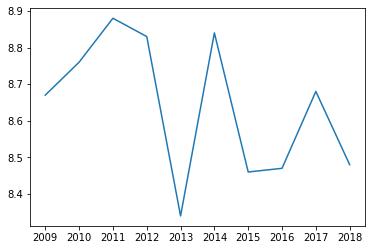

In [22]:
name_plot('Lionel Messi')

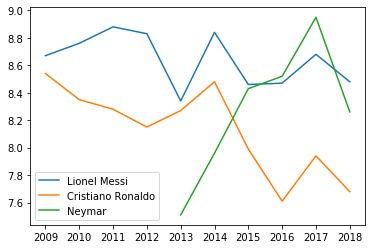

In [23]:
# plt.figure(figsize = (18, 8))

names = ['Lionel Messi', 'Cristiano Ronaldo', 'Neymar']

for name in names:
    name_plot(name)

plt.legend(names)

In [24]:
nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi", "2010"]

,,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
Name,Season,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,2010,Barcelona,24,"AM(CR),FW",31,2859,31,18,4.5,2,5.6,...,67.7,86.2,0.2,1.4,1,31,3,0,0.1,20


In [25]:
nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi"]

,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
Season,,,,,,,,,,,,,,,,,,,,,
2009,Barcelona,23,"AM(CR),FW",30,2841,34,10,4.7,1.9,4.1,...,44.3,85.7,0.6,1.3,0.7,34,3,0,0.2,14
2010,Barcelona,24,"AM(CR),FW",31,2859,31,18,4.5,2,5.6,...,67.7,86.2,0.2,1.4,1,31,3,0,0.1,20
2011,Barcelona,25,"AM(CR),FW",36,3268,50,16,5.5,2.5,4.8,...,63.8,84.2,0.4,1.4,1.5,50,6,0,0.1,24
2012,Barcelona,26,"AM(CR),FW",28,2644,46,12,5.1,1.4,3.8,...,55,85.2,0.2,2.1,0.4,46,1,0,0.2,19
2013,Barcelona,27,"AM(CR),FW",29,2508,27,11,5,2.4,4.6,...,44.4,84.9,0.3,1.1,0.4,27,2,0,0.2,13
2014,Barcelona,28,"AM(CR),FW",37,3375,43,18,4.9,2.5,4.6,...,61.4,82.9,0.5,2.7,0.9,43,4,0,0.2,25
2015,Barcelona,29,"AM(CR),FW",31,2730,26,16,4.8,2.3,3.5,...,55.7,81.9,0.4,3.5,1,26,3,0,0.2,13
2016,Barcelona,30,"AM(CR),FW",32,2833,37,9,5.3,2.3,3.7,...,48.4,80.2,0.3,2.7,0.6,37,6,0,0.2,16
2017,Barcelona,31,"AM(CR),FW",32,2997,34,12,5.5,2.4,5.1,...,52.3,81.2,0.3,2.1,0.5,34,3,0,0.2,22


In [26]:
# testDf = nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi"]

In [27]:
# if test.shape[0] == 10:
#     print("Yes")
# else:
#     print("No")

In [28]:
nameSeasonCombinedFieldPlayerDf.shape

(27918, 33)

In [29]:
nameSeasonCombinedFieldPlayerDf.index

MultiIndex([('Aaron Cresswell', '2014'),
            ('Aaron Cresswell', '2015'),
            ('Aaron Cresswell', '2016'),
            ('Aaron Cresswell', '2017'),
            ('Aaron Cresswell', '2018'),
            (   'Aaron Hughes', '2009'),
            (   'Aaron Hughes', '2010'),
            (   'Aaron Hughes', '2011'),
            (   'Aaron Hughes', '2012'),
            (   'Aaron Hughes', '2013'),
            ...
            (    'Ömer Toprak', '2015'),
            (    'Ömer Toprak', '2016'),
            (    'Ömer Toprak', '2017'),
            (    'Ömer Toprak', '2018'),
            ( 'Özkan Yildirim', '2012'),
            ( 'Özkan Yildirim', '2013'),
            ( 'Özkan Yildirim', '2014'),
            ( 'Özkan Yildirim', '2015'),
            (   'Ümit Korkmaz', '2009'),
            (   'Ümit Korkmaz', '2010')],
           names=['Name', 'Season'], length=27918)

In [30]:
nameSeasonCombinedFieldPlayerDf.index[0][0]

'Aaron Cresswell'

In [31]:
namesSet = set()
for name in nameSeasonCombinedFieldPlayerDf.index:
    namesSet.add(name[0])

In [32]:
len(namesSet)

8575

In [33]:
decadeOfPLayerDf = nameSeasonCombinedFieldPlayerDf
decadeOfPLayerDf = decadeOfPLayerDf.rename_axis(None, axis=1).reset_index()

#removing some columsns for now
decadeOfPLayerDf = decadeOfPLayerDf.drop(['Team', 'Position', 'League'], axis=1)
#convert season column to DateTime
# decadeOfPLayerDf['Season'] = pd.to_datetime(decadeOfPLayerDf.Season , format = '%Y')

decadeOfPLayerDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Cresswell,2014,25,38,3420,2,4,0.5,0.9,0.4,...,35.4,72.2,0.7,3.6,0,2,5,0,1.4,2
1,Aaron Cresswell,2015,26,37,3315,2,4,0.8,1.1,0.3,...,37.2,77.5,0.8,3.1,0,2,1,0,1.1,0
2,Aaron Cresswell,2016,27,24,2118,0,2,0.4,0.7,0.3,...,29.2,75.5,0.7,2.2,0,0,2,1,1.4,1
3,Aaron Cresswell,2017,28,35,3073,1,7,0.6,0.9,0.1,...,36.1,77.1,1,2.7,0,1,7,0,1.6,0
4,Aaron Cresswell,2018,29,18,1591,0,1,0.6,0.9,0.3,...,40.6,81.4,0.8,1.5,0,0,1,0,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27913,Özkan Yildirim,2013,21,2,259,0,0,0.4,0.2,0.9,...,7.7,67.5,0,0.3,0,0,0,0,0.2,0
27914,Özkan Yildirim,2014,22,1,59,0,0,0,0,1,...,14,64.3,0,0,0,0,0,0,1,0
27915,Özkan Yildirim,2015,23,0,13,0,0,1,0,0,...,8,75,0,0,0,0,0,0,1,0
27916,Ümit Korkmaz,2009,24,10,974,2,3,0.9,0.8,1.7,...,17.4,80.8,0.3,0.3,0.1,2,2,0,0.2,0


In [34]:
#creating a seperate DF of players who have played for a decade in europe

for name in namesSet:
    nameDf = decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]
    if nameDf.shape[0] != 10:
        decadeOfPLayerDf = decadeOfPLayerDf[decadeOfPLayerDf.Name != name]
        
decadeOfPLayerDf = decadeOfPLayerDf.set_index(['Name','Season']).sort_index()

In [35]:
decadeOfPLayerDf

Age  Apps  Minutes Total goals Total Assists  \
Name        Season                                                 
Aaron Hunt  2009     23    26     2313           9             5   
            2010     24    21     1895           3             3   
            2011     25    18     1599           3             3   
            2012     26    26     2346          11             3   
            2013     27    31     2675           7             6   
...                 ...   ...      ...         ...           ...   
Ömer Toprak 2014     25    27     2497           1             0   
            2015     26    17     1412           1             0   
            2016     27    25     2104           1             0   
            2017     28    22     2018           0             1   
            2018     29     1      233           0             0   

                   Shots per game Key passes per game Dribbles per game  \
Name        Season                                                        
Aaron Hunt  2009              1.8                 1.5               1.1   
            2010              0.9                 1.6               0.8   
            2011              2.3                 2.7               2.6   
            2012              2.9                 2.1               1.8   
            2013              1.9                 2.2               2.2   
...                           ...                 ...               ...   
Ömer Toprak 2014              0.3                 0.3               0.2   
            2015              0.6                 0.3               0.3   
            2016              0.4                 0.1               0.1   
            2017              0.5                 0.2               0.1   
            2018              0.1                   0               0.1   

                   Fouled per game Offsides per game  ... Passes per game  \
Name        Season                                    ...                   
Aaron Hunt  2009               1.8               0.2  ...            31.9   
            2010               1.3               0.4  ...            28.1   
            2011               2.4               0.4  ...            44.2   
            2012               2.6               0.2  ...            41.6   
            2013               1.7               0.7  ...            34.5   
...                            ...               ...  ...             ...   
Ömer Toprak 2014               0.9               0.1  ...            36.1   
            2015               0.6               0.1  ...            38.9   
            2016               0.4                 0  ...            50.1   
            2017                 1                 0  ...            71.2   
            2018               0.1                 0  ...            20.2   

                   Pass success percentage  Crosses per game  \
Name        Season                                             
Aaron Hunt  2009                      78.9                 1   
            2010                      79.3               0.9   
            2011                      78.7               1.2   
            2012                      79.8               1.5   
            2013                      76.5               1.8   
...                                    ...               ...   
Ömer Toprak 2014                      75.6                 0   
            2015                      76.2                 0   
            2016                      84.4                 0   
            2017                      89.9                 0   
            2018                      97.3                 0   

                   Long balls per game Through balls per game Total Goals  \
Name        Season                                                          
Aaron Hunt  2009                   1.5                    0.1           9   
            2010                   1.1                    0.1           3   
            2011

In [36]:
# decadeOfPLayerDf.loc['Neymar'] # Won't work coz neymar hasn't played for a decade in europe 
# nameSeasonCombinedFieldPlayerDf.loc['Neymar'] # works coz this is the normal DF

## Testing LSTM

## Testing Regression with mutiple timeseries to forecast

In [37]:
testColumns = columns
testColumns.remove('Team')
testColumns.remove('League')
testColumns.remove('Position')

oldNameSeasonDf = combinedFieldPlayersDf.pivot_table(index=['Name'], columns=['Season'],
                     values=testColumns, aggfunc='first').reset_index()

In [38]:
oldNameSeasonDf

Name Aerials won per game                                \
Season                                   2009 2010 2011 2012 2013 2014 2015   
0        Aaron Cresswell                  NaN  NaN  NaN  NaN  NaN  1.4  1.1   
1           Aaron Hughes                  2.4  2.8  1.8  2.9  3.2  NaN  NaN   
2             Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
3           Aaron Lennon                    -  0.1  0.2  0.2  0.1  0.2    -   
4       Aaron Leya Iseka                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                  ...                  ...  ...  ...  ...  ...  ...  ...   
8570       Óscar Serrano                  0.2    -  0.1  NaN  NaN  NaN  NaN   
8571         Óscar Trejo                  NaN  NaN  0.5  NaN  0.7  0.4  0.5   
8572         Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   
8573      Özkan Yildirim                  NaN  NaN  NaN  0.5  0.2    1    1   
8574        Ümit Korkmaz                  0.2    -  NaN  NaN  NaN  NaN  NaN   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       1.4  1.6  ...          NaN  NaN  NaN  NaN  NaN    5    1    2    7   
1       NaN  NaN  ...            2    -    -    1    2  NaN  NaN  NaN  NaN   
2       0.6  0.7  ...            3    2    -    3    2    1    2    3    1   
3         -  0.5  ...            1    1    1    1    1    2    1    -    2   
4       0.8  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN    -  NaN   
...     ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
8570    NaN  NaN  ...            7    1    1  NaN  NaN  NaN  NaN  NaN  NaN   
8571    0.7  NaN  ...          NaN  NaN    5  NaN    4    4    6    4  NaN   
8572    2.9  3.2  ...            3    2    5    8    5   10    2    6    1   
8573    NaN  NaN  ...          NaN  NaN  NaN    -    -    -    -  NaN  NaN   
8574    NaN  NaN  ...            2    -  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             
Season 2018  
0         1  
1       NaN  
2       NaN  
3         1  
4         2  
...     ...  
8570    NaN  
8571      5  
8572      -  
8573    NaN  
8574    NaN  

[8575 rows x 301 columns]

In [39]:
decadeOfOldNameSeasonDf = decadeOfPLayerDf
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.rename_axis(None, axis=1).reset_index()
decadeOfOldNameSeasonDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Hunt,2009,23,26,2313,9,5,1.8,1.5,1.1,...,31.9,78.9,1,1.5,0.1,9,3,0,0.2,3
1,Aaron Hunt,2010,24,21,1895,3,3,0.9,1.6,0.8,...,28.1,79.3,0.9,1.1,0.1,3,2,0,0.2,0
2,Aaron Hunt,2011,25,18,1599,3,3,2.3,2.7,2.6,...,44.2,78.7,1.2,2.5,0.2,3,0,1,0.6,1
3,Aaron Hunt,2012,26,26,2346,11,3,2.9,2.1,1.8,...,41.6,79.8,1.5,2.9,0.3,11,3,0,0.6,2
4,Aaron Hunt,2013,27,31,2675,7,6,1.9,2.2,2.2,...,34.5,76.5,1.8,2.6,0.1,7,2,0,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Ömer Toprak,2014,25,27,2497,1,0,0.3,0.3,0.2,...,36.1,75.6,0,3.2,0,1,10,0,3.8,1
2296,Ömer Toprak,2015,26,17,1412,1,0,0.6,0.3,0.3,...,38.9,76.2,0,3.7,0.1,1,2,0,2.9,2
2297,Ömer Toprak,2016,27,25,2104,1,0,0.4,0.1,0.1,...,50.1,84.4,0,3.2,0,1,6,0,2.9,0
2298,Ömer Toprak,2017,28,22,2018,0,1,0.5,0.2,0.1,...,71.2,89.9,0,3.7,0,0,1,0,3.2,0


In [40]:
decadeOfOldNameSeasonDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Hunt,2009,23,26,2313,9,5,1.8,1.5,1.1,...,31.9,78.9,1,1.5,0.1,9,3,0,0.2,3
1,Aaron Hunt,2010,24,21,1895,3,3,0.9,1.6,0.8,...,28.1,79.3,0.9,1.1,0.1,3,2,0,0.2,0
2,Aaron Hunt,2011,25,18,1599,3,3,2.3,2.7,2.6,...,44.2,78.7,1.2,2.5,0.2,3,0,1,0.6,1
3,Aaron Hunt,2012,26,26,2346,11,3,2.9,2.1,1.8,...,41.6,79.8,1.5,2.9,0.3,11,3,0,0.6,2
4,Aaron Hunt,2013,27,31,2675,7,6,1.9,2.2,2.2,...,34.5,76.5,1.8,2.6,0.1,7,2,0,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Ömer Toprak,2014,25,27,2497,1,0,0.3,0.3,0.2,...,36.1,75.6,0,3.2,0,1,10,0,3.8,1
2296,Ömer Toprak,2015,26,17,1412,1,0,0.6,0.3,0.3,...,38.9,76.2,0,3.7,0.1,1,2,0,2.9,2
2297,Ömer Toprak,2016,27,25,2104,1,0,0.4,0.1,0.1,...,50.1,84.4,0,3.2,0,1,6,0,2.9,0
2298,Ömer Toprak,2017,28,22,2018,0,1,0.5,0.2,0.1,...,71.2,89.9,0,3.7,0,0,1,0,3.2,0


In [41]:
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.pivot_table(index=['Name'], columns=['Season'],
                     values=testColumns, aggfunc='first').reset_index()

In [42]:
decadeOfOldNameSeasonDf

Name Aerials won per game                                \
Season                                    2009 2010 2011 2012 2013 2014 2015   
0              Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
1            Aaron Ramsey                  0.7    0  0.3  0.4  0.5  0.6  0.9   
2          Afriyie Acquah                  NaN  0.5  0.4  0.6  0.6  0.8  0.7   
3       Alberto Gilardino                  1.5  0.9  2.1  2.3  2.1  1.1  2.2   
4             Albin Ekdal                  0.5  0.3  0.8  1.7  1.2  1.4  3.4   
..                    ...                  ...  ...  ...  ...  ...  ...  ...   
225         Álvaro Morata                  NaN    0    0  1.7  0.9  0.8  0.6   
226         Étienne Didot                  0.4  0.4  0.2  0.6  0.5  1.1  1.6   
227           Éver Banega                  0.3  0.3  0.1  0.2  0.2  0.2  0.2   
228       Óscar De Marcos                  0.6  0.7  0.6    1  0.9  1.3  1.4   
229           Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
1       0.3  0.4  ...            0    1    3    5    3    6    4    3    0   
2       0.8  0.6  ...          NaN    2    5    3    7    3    9    2    3   
3       0.4  NaN  ...            1    3    3    4    8    0    4    2  NaN   
4       1.7  1.6  ...            3    4    3    8    6    7    4    2    3   
..      ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
225     0.9  1.7  ...          NaN    0    0    3    2    6    6    8    7   
226     0.6  0.9  ...            3    2    3    5    7    4    1    6    4   
227     0.2  0.4  ...           12    8    3    7    5   11    6    2    9   
228     1.1    1  ...            1    3    9   14    3    6    6    3    5   
229     2.9  3.2  ...            3    2    5    8    5   10    2    6    1   

             
Season 2018  
0       NaN  
1         0  
2         4  
3       NaN  
4         6  
..      ...  
225       5  
226       4  
227      15  
228       4  
229       0  

[230 rows x 301 columns]

In [43]:
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.fillna(0)
decadeOfOldNameSeasonDf

Name Aerials won per game                                \
Season                                    2009 2010 2011 2012 2013 2014 2015   
0              Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
1            Aaron Ramsey                  0.7    0  0.3  0.4  0.5  0.6  0.9   
2          Afriyie Acquah                    0  0.5  0.4  0.6  0.6  0.8  0.7   
3       Alberto Gilardino                  1.5  0.9  2.1  2.3  2.1  1.1  2.2   
4             Albin Ekdal                  0.5  0.3  0.8  1.7  1.2  1.4  3.4   
..                    ...                  ...  ...  ...  ...  ...  ...  ...   
225         Álvaro Morata                    0    0    0  1.7  0.9  0.8  0.6   
226         Étienne Didot                  0.4  0.4  0.2  0.6  0.5  1.1  1.6   
227           Éver Banega                  0.3  0.3  0.1  0.2  0.2  0.2  0.2   
228       Óscar De Marcos                  0.6  0.7  0.6    1  0.9  1.3  1.4   
229           Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
1       0.3  0.4  ...            0    1    3    5    3    6    4    3    0   
2       0.8  0.6  ...            0    2    5    3    7    3    9    2    3   
3       0.4    0  ...            1    3    3    4    8    0    4    2    0   
4       1.7  1.6  ...            3    4    3    8    6    7    4    2    3   
..      ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
225     0.9  1.7  ...            0    0    0    3    2    6    6    8    7   
226     0.6  0.9  ...            3    2    3    5    7    4    1    6    4   
227     0.2  0.4  ...           12    8    3    7    5   11    6    2    9   
228     1.1    1  ...            1    3    9   14    3    6    6    3    5   
229     2.9  3.2  ...            3    2    5    8    5   10    2    6    1   

             
Season 2018  
0         0  
1         0  
2         4  
3         0  
4         6  
..      ...  
225       5  
226       4  
227      15  
228       4  
229       0  

[230 rows x 301 columns]

In [106]:
allPlayerRatingDf = decadeOfPLayerDf.pivot_table(index=['Name'], columns=['Season'],
                     values=['Rating'], aggfunc='first').reset_index()

In [107]:
allPlayerRatingDf = allPlayerRatingDf.fillna(0)

In [86]:
#Get only currently active players
# allPlayerRatingDf = allPlayerRatingDf[allPlayerRatingDf.Rating['2018'].notnull()]

In [87]:
allPlayerRatingDf

Name Rating                                            \
Season                      2009  2010  2011  2012  2013  2014  2015  2016   
0              Aaron Hunt   7.15  6.65  7.44  7.32  7.31  6.44  6.88  6.65   
1            Aaron Ramsey   6.86  6.46  6.77  6.96  7.76  7.07  7.21  6.72   
2          Afriyie Acquah   0.00  6.43  6.40  6.50  6.71  6.86  6.70  6.41   
3       Alberto Gilardino   6.99  6.79  7.05  6.83  6.68  6.72  6.52  6.00   
4             Albin Ekdal   6.80  6.60  7.03  6.97  6.71  7.16  6.97  6.54   
..                    ...    ...   ...   ...   ...   ...   ...   ...   ...   
225         Álvaro Morata   0.00  6.08  6.16  6.68  6.66  6.74  6.76  7.17   
226         Étienne Didot   6.90  6.93  7.23  6.98  6.92  6.68  6.83  6.78   
227           Éver Banega   7.20  7.09  7.42  7.14  6.95  7.00  7.21  7.16   
228       Óscar De Marcos   6.52  6.50  6.91  6.80  6.64  6.85  7.02  6.76   
229           Ömer Toprak   6.28  6.49  6.79  6.95  7.08  7.41  7.09  6.72   

              ... Total goals                                               
Season  2017  ...        2009 2010 2011 2012 2013 2014 2015 2016 2017 2018  
0       6.79  ...           9    3    3   11    7    2    1    4    3    0  
1       7.27  ...           3    1    2    1   10    6    5    1    7    4  
2       6.22  ...           0    0    0    0    1    1    2    2    1    2  
3       0.00  ...          15   12    4   13   15    4   10    0    0    0  
4       6.61  ...           1    1    1    1    1    5    0    1    0    0  
..       ...  ...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
225     6.94  ...           0    0    0    2    8    8    7   15   11    6  
226     6.66  ...           1    2    1    2    1    0    0    1    2    1  
227     7.08  ...           2    2    0    4    1    3    5    6    3    3  
228     6.74  ...           1    0    4    6    5    1    1    1    1    1  
229     6.93  ...           0    0    0    1    1    1    1    1    0    0  

[230 rows x 21 columns]

In [48]:
decadeOfOldNameSeasonDf.Name.tolist()

['Aaron Hunt',
 'Aaron Ramsey',
 'Afriyie Acquah',
 'Alberto Gilardino',
 'Albin Ekdal',
 'Aleksandar Kolarov',
 'Alexander Esswein',
 'Alexandre Lacazette',
 'Alexis Ruano',
 'Ander Herrera',
 'Ander Iturraspe',
 'Andrea Poli',
 'Andrés Guardado',
 'Antonio Valencia',
 'Aritz Aduriz',
 'Arjen Robben',
 'Arturo Vidal',
 'Ashley Young',
 'Benjamin Stambouli',
 'Borja Valero',
 'Bostjan Cesar',
 'Carlos Vela',
 "Cheikh M'Bengue",
 'Chris Smalling',
 'Christian Fuchs',
 'Christophe Jallet',
 'Claudio Pizarro',
 'Cristiano Ronaldo',
 'Cristián Zapata',
 'Dani Alves',
 'Daniel Congré',
 'Daniel Parejo',
 'Daniel Schwaab',
 'Daniele Bonera',
 'Daniele De Rossi',
 'Danny Rose',
 'Darren Fletcher',
 'David Luiz',
 'David Silva',
 'Dejan Lovren',
 'Diego',
 'Diego Costa',
 'Diego Godín',
 'Djamel Mesbah',
 'Eden Hazard',
 'Edinson Cavani',
 'Eljero Elia',
 'Emanuele Giaccherini',
 'Emiliano Moretti',
 'Eric Maxim Choupo-Moting',
 'Esteban Granero',
 'Etienne Capoue',
 'Eugen Polanski',
 'Ezequi

In [49]:
decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == 'Aaron Hunt']['Rating']['2018'].tolist()[0]

0.0

In [50]:
#creating a non pivot table with all active player ratings

currentColumns=['Name', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
currentList = []
for name in decadeOfOldNameSeasonDf.Name.tolist():
    currentName = name
#     print(currentName)
    rating09 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2009'].tolist()[0]
    rating10 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2010'].tolist()[0]
    rating11 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2011'].tolist()[0]
    rating12 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2012'].tolist()[0]
    rating13 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2013'].tolist()[0]
    rating14 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2014'].tolist()[0]
    rating15 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2015'].tolist()[0]
    rating16 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2016'].tolist()[0]
    rating17 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2017'].tolist()[0]
    rating18 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2018'].tolist()[0]
    currentList.append([currentName, rating09, rating10, rating11, rating12, rating13, rating14, rating15, rating16, rating17, rating18])

activePlayerRatingDf = pd.DataFrame(currentList, columns=currentColumns)
activePlayerRatingDf

,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aaron Hunt,7.15,6.65,7.44,7.32,7.31,6.44,6.88,6.65,6.79,0.00
1,Aaron Ramsey,6.86,6.46,6.77,6.96,7.76,7.07,7.21,6.72,7.27,6.70
2,Afriyie Acquah,0.00,6.43,6.40,6.50,6.71,6.86,6.70,6.41,6.22,6.42
3,Alberto Gilardino,6.99,6.79,7.05,6.83,6.68,6.72,6.52,6.00,0.00,0.00
4,Albin Ekdal,6.80,6.60,7.03,6.97,6.71,7.16,6.97,6.54,6.61,6.99
...,...,...,...,...,...,...,...,...,...,...,...
225,Álvaro Morata,0.00,6.08,6.16,6.68,6.66,6.74,6.76,7.17,6.94,7.10
226,Étienne Didot,6.90,6.93,7.23,6.98,6.92,6.68,6.83,6.78,6.66,6.42
227,Éver Banega,7.20,7.09,7.42,7.14,6.95,7.00,7.21,7.16,7.08,7.08
228,Óscar De Marcos,6.52,6.50,6.91,6.80,6.64,6.85,7.02,6.76,6.74,6.57


In [133]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [52]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [53]:
activePlayerRatingDf.loc[activePlayerRatingDf['Name'] == 'Aaron Hunt'].set_index('Name')

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,
Aaron Hunt,7.15,6.65,7.44,7.32,7.31,6.44,6.88,6.65,6.79,0.0


In [54]:
# First, we get the data
stockList = decadeOfOldNameSeasonDf.Name.tolist()
stockList

['Aaron Hunt',
 'Aaron Ramsey',
 'Afriyie Acquah',
 'Alberto Gilardino',
 'Albin Ekdal',
 'Aleksandar Kolarov',
 'Alexander Esswein',
 'Alexandre Lacazette',
 'Alexis Ruano',
 'Ander Herrera',
 'Ander Iturraspe',
 'Andrea Poli',
 'Andrés Guardado',
 'Antonio Valencia',
 'Aritz Aduriz',
 'Arjen Robben',
 'Arturo Vidal',
 'Ashley Young',
 'Benjamin Stambouli',
 'Borja Valero',
 'Bostjan Cesar',
 'Carlos Vela',
 "Cheikh M'Bengue",
 'Chris Smalling',
 'Christian Fuchs',
 'Christophe Jallet',
 'Claudio Pizarro',
 'Cristiano Ronaldo',
 'Cristián Zapata',
 'Dani Alves',
 'Daniel Congré',
 'Daniel Parejo',
 'Daniel Schwaab',
 'Daniele Bonera',
 'Daniele De Rossi',
 'Danny Rose',
 'Darren Fletcher',
 'David Luiz',
 'David Silva',
 'Dejan Lovren',
 'Diego',
 'Diego Costa',
 'Diego Godín',
 'Djamel Mesbah',
 'Eden Hazard',
 'Edinson Cavani',
 'Eljero Elia',
 'Emanuele Giaccherini',
 'Emiliano Moretti',
 'Eric Maxim Choupo-Moting',
 'Esteban Granero',
 'Etienne Capoue',
 'Eugen Polanski',
 'Ezequi

In [83]:
allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == stockList[0]]['Rating'][str(2009)].tolist()[0]

7.15

In [108]:
#creating a non pivot table with all active player ratings

df_ = {}

for name in stockList:
    testColumn=['Name', 'Season', 'Rating']
    testList = []
    currentName = name
#     print(currentName)
    for i in range(2009, 2019):
#         print(allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == 'Aaron Hunt']['Rating'][str(i)].tolist())
        testList.append([name, i, allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == name]['Rating'][str(i)].tolist()[0]])
    
    testDf = pd.DataFrame(testList, columns=testColumn)
    df_[name] = testDf.set_index('Season')
    df_[name].index = pd.to_datetime(df_[name].index, format = '%Y')
# allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == 'Aaron Cresswell']['Rating']['2009'].tolist()[0]

In [109]:
# test = pd.to_datetime(df_['Lionel Messi'].index, format = '%Y')

In [110]:
df_['Lionel Messi']

,Name,Rating
Season,,
2009-01-01,Lionel Messi,8.67
2010-01-01,Lionel Messi,8.76
2011-01-01,Lionel Messi,8.88
2012-01-01,Lionel Messi,8.83
2013-01-01,Lionel Messi,8.34
2014-01-01,Lionel Messi,8.84
2015-01-01,Lionel Messi,8.46
2016-01-01,Lionel Messi,8.47
2017-01-01,Lionel Messi,8.68


In [111]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2015", "Rating")

In [112]:
df_new['Lionel Messi']

{'Train': Season
 2009-01-01    8.67
 2010-01-01    8.76
 2011-01-01    8.88
 2012-01-01    8.83
 2013-01-01    8.34
 2014-01-01    8.84
 2015-01-01    8.46
 Name: Rating, dtype: float64, 'Test': Season
 2015-01-01    8.46
 2016-01-01    8.47
 2017-01-01    8.68
 2018-01-01    8.48
 Name: Rating, dtype: float64}

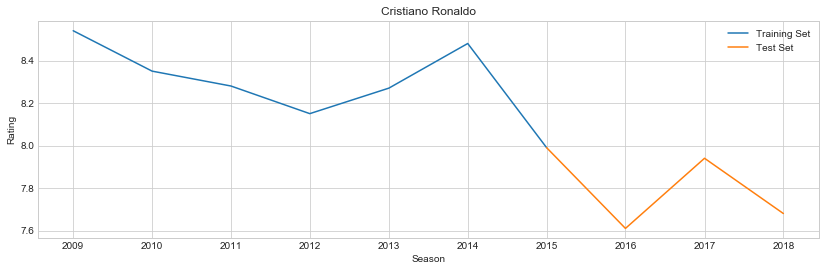

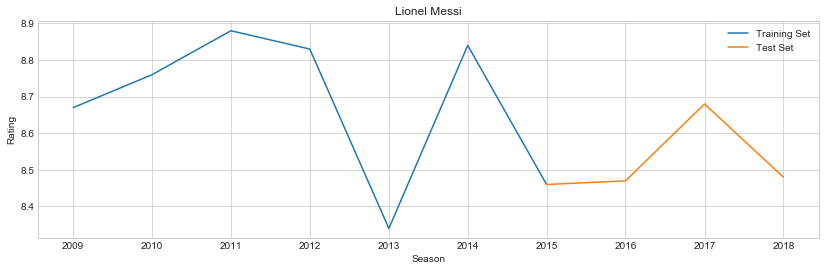

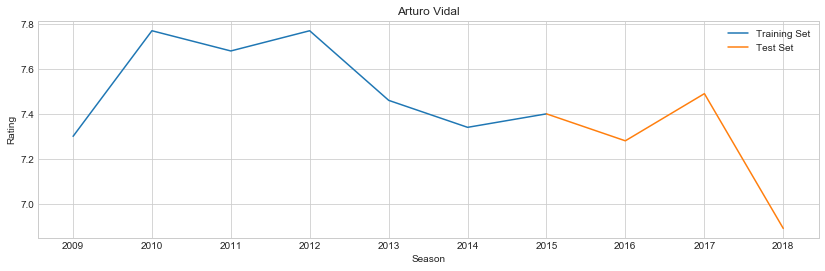

In [113]:
playerList = ['Cristiano Ronaldo', 'Lionel Messi', 'Arturo Vidal']

for i in playerList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Rating")
    plt.xlabel("Season")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i)

In [114]:
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [115]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

Aaron Hunt (7, 1)
Aaron Ramsey (7, 1)
Afriyie Acquah (7, 1)
Alberto Gilardino (7, 1)
Albin Ekdal (7, 1)
Aleksandar Kolarov (7, 1)
Alexander Esswein (7, 1)
Alexandre Lacazette (7, 1)
Alexis Ruano (7, 1)
Ander Herrera (7, 1)
Ander Iturraspe (7, 1)
Andrea Poli (7, 1)
Andrés Guardado (7, 1)
Antonio Valencia (7, 1)
Aritz Aduriz (7, 1)
Arjen Robben (7, 1)
Arturo Vidal (7, 1)
Ashley Young (7, 1)
Benjamin Stambouli (7, 1)
Borja Valero (7, 1)
Bostjan Cesar (7, 1)
Carlos Vela (7, 1)
Cheikh M'Bengue (7, 1)
Chris Smalling (7, 1)
Christian Fuchs (7, 1)
Christophe Jallet (7, 1)
Claudio Pizarro (7, 1)
Cristiano Ronaldo (7, 1)
Cristián Zapata (7, 1)
Dani Alves (7, 1)
Daniel Congré (7, 1)
Daniel Parejo (7, 1)
Daniel Schwaab (7, 1)
Daniele Bonera (7, 1)
Daniele De Rossi (7, 1)
Danny Rose (7, 1)
Darren Fletcher (7, 1)
David Luiz (7, 1)
David Silva (7, 1)
Dejan Lovren (7, 1)
Diego (7, 1)
Diego Costa (7, 1)
Diego Godín (7, 1)
Djamel Mesbah (7, 1)
Eden Hazard (7, 1)
Edinson Cavani (7, 1)
Eljero Elia (7, 1)


In [116]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(2,7):
        X_train.append(transform_train[j][i-2:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(2, 4):
        X_test.append(transform_test[j][i-2:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [117]:
trainset

{'Aaron Hunt': {'X': array([[[0.71],
          [0.21]],
  
         [[0.21],
          [1.  ]],
  
         [[1.  ],
          [0.88]],
  
         [[0.88],
          [0.87]],
  
         [[0.87],
          [0.  ]]]), 'y': array([1.  , 0.88, 0.87, 0.  , 0.44])},
 'Aaron Ramsey': {'X': array([[[0.30769231],
          [0.        ]],
  
         [[0.        ],
          [0.23846154]],
  
         [[0.23846154],
          [0.38461538]],
  
         [[0.38461538],
          [1.        ]],
  
         [[1.        ],
          [0.46923077]]]),
  'y': array([0.23846154, 0.38461538, 1.        , 0.46923077, 0.57692308])},
 'Afriyie Acquah': {'X': array([[[0.        ],
          [0.93731778]],
  
         [[0.93731778],
          [0.93294461]],
  
         [[0.93294461],
          [0.94752187]],
  
         [[0.94752187],
          [0.97813411]],
  
         [[0.97813411],
          [1.        ]]]),
  'y': array([0.93294461, 0.94752187, 0.97813411, 1.        , 0.97667638])},
 'Alberto Gilardino':

In [118]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
Aaron Hunt,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Aaron Ramsey,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Afriyie Acquah,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Alberto Gilardino,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Albin Ekdal,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
...,...,...,...,...
Álvaro Morata,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Étienne Didot,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Éver Banega,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Óscar De Marcos,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"


In [135]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to Aaron Hunt
Epoch 1/10
5/5 [==============================] - 2s 416ms/step - loss: 0.5444
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.5094
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4967
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.4797
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4714
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.4497
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4330
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4127
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.4125
Fitting to Aaron Ramsey
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2155
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2044
Epoch 3/10
5/5 [===

Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0564
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0484
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0661
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0304
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0700
Fitting to Andrea Poli
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.2278
Epoch 2/10
5/5 [==============================] - 0s 992us/step - loss: 0.0676
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 4/10
5/5 [==============================] - 0s 992us/step - loss: 0.1132
Epoch 5/10
5/5 [======================

Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1363
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 9/10
5/5 [==============================] - 0s 998us/step - loss: 0.0704
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0781
Fitting to Carlos Vela
Epoch 1/10
5/5 [==============================] - 0s 996us/step - loss: 0.0869
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1197
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1115
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 6/10
5/5 [==============================] - 0s 992us/step - loss: 0.1558
Epoch 7/10
5/5 [============================

Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0839
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0907
Fitting to Daniel Parejo
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0975
Epoch 3/10
5/5 [==============================] - 0s 992us/step - loss: 0.0360
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0511
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0833
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 7/10
5/5 [==============================] - 0s 998us/step - loss: 0.1027
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 9/10
5/5 [========================

Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1645
Fitting to Diego Costa
Epoch 1/10
5/5 [==============================] - 0s 996us/step - loss: 0.1221
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1518
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0897
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 6/10
5/5 [==============================] - 0s 998us/step - loss: 0.0703
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0301
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0621
Epoch 9/10
5/5 [==============================] - 0s 992us/step - loss: 0.0460
Epoch 10/10
5/5 [==============================] - 0s 993us/step - loss: 0.0343
Fitting to Diego Godín
Epoch 1/10
5/5 [==============================] - 0s 992us/step - loss: 0.0932
Epoch 2/

Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1888
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1619
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1849
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1913
Epoch 7/10
5/5 [==============================] - 0s 993us/step - loss: 0.1791
Epoch 8/10
5/5 [==============================] - 0s 993us/step - loss: 0.1632
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1919
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1918
Fitting to Eugen Polanski
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 2/10
5/5 [==============================] - 0s 802us/step - loss: 0.2046
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2101
Epoch 4/10
5/5 [=======================

Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.1065
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0924
Epoch 7/10
5/5 [==============================] - 0s 998us/step - loss: 0.1052
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1181
Epoch 9/10
5/5 [==============================] - 0s 798us/step - loss: 0.0679
Epoch 10/10
5/5 [==============================] - 0s 798us/step - loss: 0.1180
Fitting to Francis Coquelin
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3125
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.2465
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1764
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1408
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0518
Epoch 6/10
5/5 [===============

Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1542
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1247
Epoch 9/10
5/5 [==============================] - 0s 993us/step - loss: 0.0865
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0845
Fitting to Giorgio Chiellini
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1944
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1503
Epoch 3/10
5/5 [==============================] - 0s 998us/step - loss: 0.1762
Epoch 4/10
5/5 [==============================] - 0s 993us/step - loss: 0.1899
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1897
Epoch 6/10
5/5 [==============================] - 0s 996us/step - loss: 0.1381
Epoch 7/10
5/5 [==============================] - 0s 998us/step - loss: 0.1484
Epoch 8/10
5/5 [================

Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0913
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0742
Fitting to Iker Muniain
Epoch 1/10
5/5 [==============================] - 0s 995us/step - loss: 0.1533
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1624
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1599
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1451
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1585
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1254
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1322
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1183
Epoch 10/10
5/5 [==========================

Epoch 10/10
5/5 [==============================] - 0s 998us/step - loss: 0.0144
Fitting to Javier Mascherano
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.2958
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1661
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.3289
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2089
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0963
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1443
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0949
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0939
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1066
Fitting to Javier Pastore
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1628
Epo

Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0442
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0097
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 7/10
5/5 [==============================] - 0s 992us/step - loss: 0.0188
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 10/10
5/5 [==============================] - 0s 996us/step - loss: 0.0216
Fitting to Jonny Evans
Epoch 1/10
5/5 [==============================] - 0s 996us/step - loss: 0.1408
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1107
Epoch 3/10
5/5 [==============================] - 0s 998us/step - loss: 0.0593
Epoch 4/10
5/5 [========================

Epoch 4/10
5/5 [==============================] - 0s 994us/step - loss: 0.0818
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0998
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0619
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0822
Fitting to Kevin Gameiro
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2732
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1198
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0560
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0896
Epoch 6/10
5/5 [============================

Epoch 6/10
5/5 [==============================] - 0s 993us/step - loss: 0.1781
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1781
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2160
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1769
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.2009
Fitting to Loic Perrin
Epoch 1/10
5/5 [==============================] - 0s 996us/step - loss: 0.1186
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 3/10
5/5 [==============================] - 0s 992us/step - loss: 0.1442
Epoch 4/10
5/5 [==============================] - 0s 998us/step - loss: 0.1771
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2020
Epoch 6/10
5/5 [==============================] - 0s 992us/step - loss: 0.1415
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1251
Epoch 8/10
5/5 [======================

Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1266
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1349
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1205
Fitting to Marc Albrighton
Epoch 1/10
5/5 [==============================] - 0s 998us/step - loss: 0.1270
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1388
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1112
Epoch 4/10
5/5 [==============================] - 0s 998us/step - loss: 0.1205
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0946
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1119
Epoch 7/10
5/5 [==============================] - 0s 991us/step - loss: 0.1146
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0894
Epoch 10/10
5/5 [=======================

Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0341
Fitting to Martin Kelly
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3320
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1730
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0922
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0882
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0714
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0760
Epoch 8/10
5/5 [==============================] - 0s 993us/step - loss: 0.0710
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0710
Fitting to Martín Demichelis
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 2/10
5/5 [=

Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0450
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0561
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 6/10
5/5 [==============================] - 0s 992us/step - loss: 0.0487
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 8/10
5/5 [==============================] - 0s 992us/step - loss: 0.0230
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0572
Fitting to Michael Ciani
Epoch 1/10
5/5 [==============================] - 0s 992us/step - loss: 0.1051
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1470
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 4/10
5/5 [========================

Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 5/10
5/5 [==============================] - 0s 996us/step - loss: 0.0158
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0074
Fitting to Pablo Hernández
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4446
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2356
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.2034
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1079
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1212
Epoch 6/10
5/5 [==========================

Epoch 6/10
5/5 [==============================] - 0s 992us/step - loss: 0.0494
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0363
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 10/10
5/5 [==============================] - 0s 992us/step - loss: 0.0219
Fitting to Per Mertesacker
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1917
Epoch 2/10
5/5 [==============================] - 0s 798us/step - loss: 0.1312
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1283
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0838
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1258
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 8/10
5/5 [==================

Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1783
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1815
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2367
Fitting to Rodrigo Palacio
Epoch 1/10
5/5 [==============================] - 0s 996us/step - loss: 0.1395
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1374
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1082
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1258
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0844
Epoch 6/10
5/5 [==============================] - 0s 992us/step - loss: 0.1411
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0949
Epoch 10/10
5/5 [===================

Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1104
Fitting to Sergio Busquets
Epoch 1/10
5/5 [==============================] - 0s 992us/step - loss: 0.1238
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1146
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0763
Epoch 6/10
5/5 [==============================] - 0s 998us/step - loss: 0.0752
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0693
Epoch 9/10
5/5 [==============================] - 0s 998us/step - loss: 0.0967
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0935
Fitting to Sergio Pellissier
Epoch 1/10
5/5 [==============================] - 0s 992us/step - loss: 0.1084
Epoch 

Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1114
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0186
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0156
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0287
Fitting to Steven Nzonzi
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6143
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.2554
Epoch 4/10
5/5 [============================

Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1612
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1654
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1696
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1553
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1381
Fitting to Toni Kroos
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0530
Epoch 4/10
5/5 [==============================] - 0s 998us/step - loss: 0.0407
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 7/10
5/5 [==============================]

Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1394
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1490
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1450
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0955
Fitting to Álvaro Morata
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 2/10
5/5 [==============================] - 0s 991us/step - loss: 0.1790
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1270
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0738
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0797
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0770
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 9/10
5/5 [==========================

[[7.94]
 [7.68]]
[[7.8713856]
 [7.874009 ]]
[[8.68]
 [8.48]]
[[8.610622]
 [8.613313]]
[[7.49]
 [6.89]]
[[7.3077745]
 [7.310378 ]]


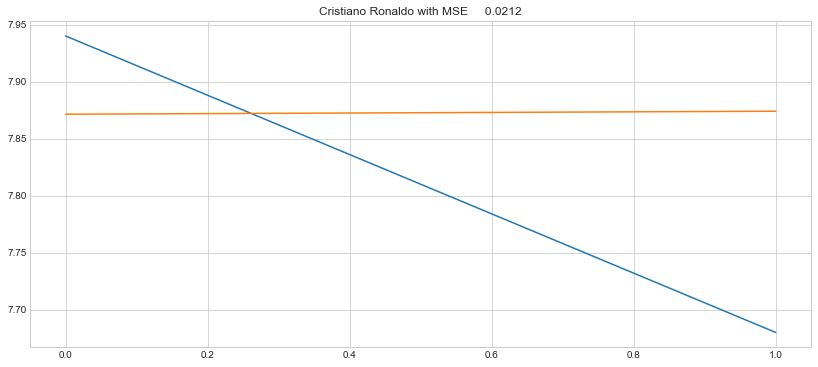

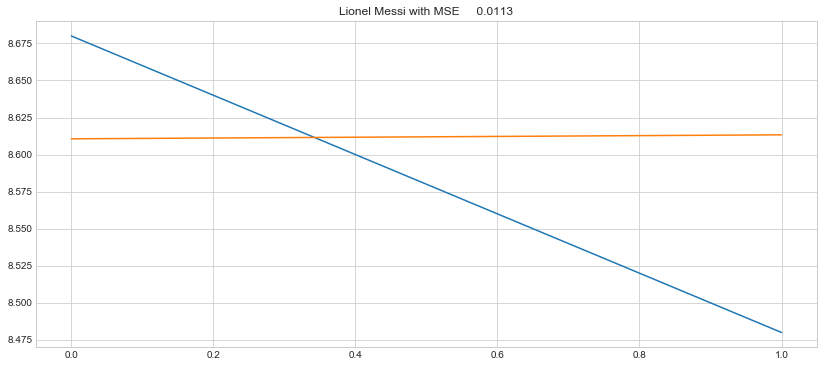

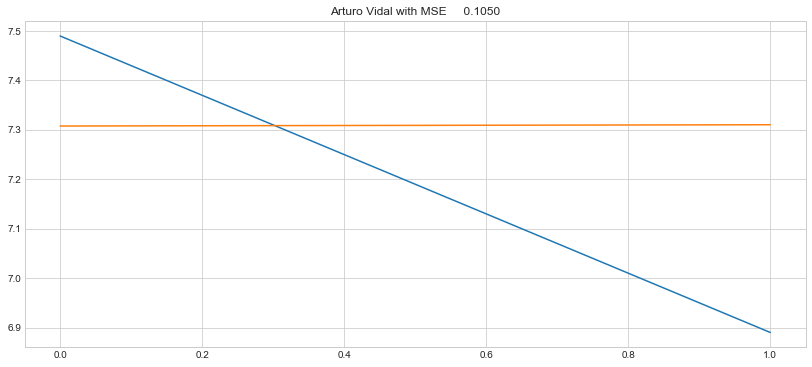

In [126]:
pred_result = {}
for i in playerList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)
    print(y_true)
    print(y_pred)

In [128]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressorGRU.fit(trainset[i]["X"], trainset[i]["y"],epochs=50,batch_size=150)

Fitting to Aaron Hunt
Epoch 1/50
5/5 [==============================] - 2s 492ms/step - loss: 0.5320
Epoch 2/50
5/5 [==============================] - 0s 997us/step - loss: 0.4906
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.4256
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.3512
Epoch 5/50
5/5 [==============================] - 0s 992us/step - loss: 0.2776
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2151
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 8/50
5/5 [==============================] - 0s 992us/step - loss: 0.1477
Epoch 9/50
5/5 [==============================] - 0s 992us/step - loss: 0.1243
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1505
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1564
Epoch 13/50
5/5 [======================

Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 7.0632e-04
Epoch 11/50
5/5 [==============================] - 0s 997us/step - loss: 0.0084
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0514
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 17/50
5/5 [==============================] - 0s 1ms/step 

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 11/50
5/5 [==============================] - 0s 998us/step - loss: 0.0774
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0733
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.0872
Epoch 17/50
5/5 [==============================] - 0s 998us/step - loss: 0.0795
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0771
Epoch 19/50
5/5 [==============================] - 0s 998us/step - loss: 0.0631
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0800
Epoch 22/50
5/5 [==============================] - 0s 1m

Epoch 14/50
5/5 [==============================] - 0s 997us/step - loss: 0.0242
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 26/50
5/5 [==============================] - 0s 1ms/step

5/5 [==============================] - 0s 1ms/step - loss: 0.1530
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1549
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1516
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1408
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1508
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1428
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1330
Epoch 26/50
5/5 [==============================] - 0s 998us/step - loss: 0.1350
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.1359
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 29/50
5/5 [==============================] - 0s 997us/step - loss: 0.1278
Epoch 30/50
5/5 [==============================] - 0s 998us/step - los

Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 30/50
5/5 [==============================] - 0s 999us/step - loss: 0.0413
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 35/50
5/5 [==============================] - 0s 1ms/step

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1447
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1444
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.1518
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1482
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1368
Epoch 35/50
5/5 [==============================] - 0s 997us/step - loss: 0.1396
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1516
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1472
Epoch 40/50
5/5 [==============================] - 0s 1ms/st

Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1719
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1776
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1648
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1741
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1561
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 40/50
5/5 [==============================] - 0s 996us/step - loss: 0.1640
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1743
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1618
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 45/50
5/5 [==============================] - 0s 1ms/step

Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1231
Epoch 39/50
5/5 [==============================] - 0s 997us/step - loss: 0.1209
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1323
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.1331
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1241
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 49/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1245
Epoch 50/50
5/5 [==============================] - 0s 1ms/st

Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 9.2612e-04
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 6.1221e-04
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 5.9053e-04
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Fitting to Borja Valero
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2322
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2191
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 5/50
5/5 [================

5/5 [==============================] - 0s 1ms/step - loss: 0.0931
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0937
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0927
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0888
Fitting to Carlos Vela
Epoch 1/50
5/5 [==============================] - 0s 997us/step - loss: 0.0764
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0777
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0758
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.0748
Epoch 5/50
5/5 [==============================] - 0s 997us/step - loss: 0.0697
Epoch 6/50
5/5 [==============================] - 0s 996us/step - loss: 0.0678
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 8/50
5/5 [==============================] - 0s 996us/step - loss: 0.0645
Epoch 9/50
5/5 [==============================] - 0

Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 4/50
5/5 [==============================] - 0s 992us/step - loss: 0.0606
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0609
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0533
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0515
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 14/50
5/5 [==============================] - 0s 997us/step - los

Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1293
Epoch 9/50
5/5 [==============================] - 0s 996us/step - loss: 0.1360
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1356
Epoch 11/50
5/5 [==============================] - 0s 997us/step - loss: 0.1325
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1313
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1310
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1320
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1332
Epoch 19/50
5/5 [==============================] - 0s 1ms/step 

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0845
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0846
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0865
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0876
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0856
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0869
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0881
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0862
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 24/50
5/5 [==============================] - 0s 1ms/step -

Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0423
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 21/50
5/5 [==============================] - 0s 998us/step - loss: 0.0446
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0416
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 27/50
5/5 [==============================] - 0s 991us/step - loss: 0.0400
Epoch 28/50
5/5 [==============================] - 0s 997us/step - loss: 0.0402
Epoch 29/50
5/5 [==============================] - 0s 995u

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0833
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0791
Epoch 26/50
5/5 [==============================] - 0s 997us/step - loss: 0.0814
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 28/50
5/5 [==============================] - 0s 997us/step - loss: 0.0784
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0806
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0791
Epoch 31/50
5/5 [==============================] - 0s 997us/step - loss: 0.0822
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0783
Epoch 34/50
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.1317
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 29/50
5/5 [==============================] - 0s 997us/step - loss: 0.1322
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1317
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1313
Epoch 33/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1285
Epoch 34/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1309
Epoch 35/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1312
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1288
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0

Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0810
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0803
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0823
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0783
Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.0788
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0810
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0797
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0809
Epoch 43/50
5/5 [==============================] - 0s 1ms/step

Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 5.4693e-04
Epoch 37/50
5/5 [==============================] - 0s 997us/step - loss: 9.1017e-04
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 41/50
5/5 [==============================] - 0s 997us/step - loss: 0.0049
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 46/50
5/5 [==============================] - 0s 997us/step - loss: 0.0058
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 48/50
5/5 [==============================] -

Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1151
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 43/50
5/5 [==============================] - 0s 997us/step - loss: 0.1149
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1164
Epoch 47/50
5/5 [==============================] - 0s 997us/step - loss: 0.1161
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1147
Epoch 49/50
5/5 [==============================] - 0s 997us/step - loss: 0.1149
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1150
Fitting to Diego
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 3/50
5/5 [===========================

Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0473
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0470
Fitting to Diego Godín
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1260
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1264
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 4/50
5/5 [==============================] - 0s 995us/step - loss: 0.1238
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1235
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254
Epoch 8/50
5/5 [==============================

Fitting to Eden Hazard
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2690
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2680
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2589
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2439
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2313
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2133
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1674
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1519
Epoch 11/50
5/5 [==============================] - 0s 997us/step - loss: 0.1472
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 13/50
5/5 [==============================]

Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1149
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.1083
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1067
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1056
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1012
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - l

Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 15/50
5/5 [==============================] - 0s 997us/step - loss: 0.0243
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 20/50
5/5 [==============================] - 0s 991us/step - loss: 0.0262
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 23/50
5/5 [==============================] - 0s 1ms/st

Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0500
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.0446
Epoch 28/50
5/5 [==============================] - 0s 1ms/step

Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1424
Epoch 22/50
5/5 [==============================] - 0s 998us/step - loss: 0.1425
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1419
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1422
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1428
Epoch 26/50
5/5 [==============================] - 0s 998us/step - loss: 0.1409
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1396
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1398
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1399
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1388
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1382
Epoch 33/50
5/5 [==============================] - 0s 1ms/st

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0707
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0706
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0696
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 33/50
5/5 [==============================] - 0s 995us/step - loss: 0.0686
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0705
Epoch 38/50
5/5 [==============================] - 0s 1ms/step

Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1545
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1525
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1539
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1530
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1513
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1534
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1545
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1532
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1526
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1528
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1514
Epoch 43/50
5/5 [==============================] - 0s 1ms/step -

Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1286
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1283
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1318
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 43/50
5/5 [==============================] - 0s 997us/step - loss: 0.1310
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 47/50
5/5 [==============================] - 0s 1ms/step

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1058
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1047
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1055
Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.1067
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1065
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1071
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1064
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1064
Fitting to Florent Balmont
Epoch 1/50
5/5 [===================

Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.0049
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 50/50
5/5 [==============================] - 0s 997us/step - loss: 0.0049
Fitting to Franck Ribéry
Epoch 1/50
5/5 [==============================] - 0s 995us/step - loss: 0.1843
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.1730
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 6/50
5/5 [====================

Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1137
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1126
Fitting to Gabriel Silva
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3160
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2834
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2534
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2182
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1427
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1080
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0777
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 11/50
5/5 [==============================]

Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.0779
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 6/50
5/5 [==============================] - 0s 998us/step - loss: 0.0564
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.0178
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 15/50
5/5 [==============================] - 0s 997us/step - loss: 0.0017
Epoch 16/50
5/5 [==============================] - 0s 1ms/step

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1540
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1445
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 13/50
5/5 [==============================] - 0s 997us/step - loss: 0.1334
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 16/50
5/5 [==============================] - 0s 998us/step - loss: 0.1314
Epoch 17/50
5/5 [==============================] - 0s 998us/step - loss: 0.1332
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1377
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1398
Epoch 21/50
5/5 [==============================] - 0s 1ms/s

Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0591
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0499
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0762
Epoch 21/50
5/5 [==============================] - 0s 997us/step - loss: 0.0815
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0854
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0873
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0879
Epoch 25/50
5/5 [==============================] - 0s 998us/st

Epoch 18/50
5/5 [==============================] - 0s 997us/step - loss: 0.1355
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1354
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 21/50
5/5 [==============================] - 0s 998us/step - loss: 0.1360
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1359
Epoch 23/50
5/5 [==============================] - 0s 998us/step - loss: 0.1362
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1358
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1358
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1359
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1355
Epoch 30/50
5/5 [==============================] - 0s 1ms/

Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1268
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1270
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1236
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1192
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1168
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1128
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.1099
Epoch 35/50
5/5 [==============================] - 0s 1ms/step

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0473
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.0470
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 40/50
5/5 [==============================] - 0s 1ms/step

Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 37/50
5/5 [==============================] - 0s 997us/step - loss: 0.0019
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 45/50
5/5 [==============================] - 0s 1ms/step

Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.0830
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0830
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0834
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0836
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 45/50
5/5 [==============================] - 0s 998us/step - loss: 0.0838
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 48/50
5/5 [==============================] - 0s 998us/step - loss: 0.0840
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 50/50
5/5 [==============================] - 0s 1ms/

Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1176
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1176
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1173
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1179
Epoch 49/50
5/5 [==============================] - 0s 998us/step - loss: 0.1179
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1175
Fitting to Ivan Perisic
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1214
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 5/50
5/5 [==========================

Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2034
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2034
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2029
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2028
Fitting to James Collins
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1194
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1139
Epoch 3/50
5/5 [==============================] - 0s 998us/step - loss: 0.1052
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0946
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0828
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0704
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.0478
Epoch 9/50
5/5 [===========================

5/5 [==============================] - 0s 1ms/step - loss: 0.2292
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2253
Epoch 3/50
5/5 [==============================] - 0s 996us/step - loss: 0.2184
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2096
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2009
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1903
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1800
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1517
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1480
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1465
Epoc

Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1730
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1654
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1618
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.1584
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1561
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1539
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1523
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1513
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1504
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1503
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1503
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - lo

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1195
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1119
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1080
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1070
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1082
Epoch 17/50
5/5 [==============================] - 0s 998us/step - loss: 0.1108
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1182
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1246
Epoch 22/50
5/5 [==============================] - 0s 1ms/step

Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0599
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0599
Epoch 17/50
5/5 [==============================] - 0s 997us/step - loss: 0.0599
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 23/50
5/5 [==============================] - 0s 997us/step - loss: 0.0603
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0601
Epoch 27/50
5/5 [==============================] - 0s 1ms/st

Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1162
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1162
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1162
Epoch 26/50
5/5 [==============================] - 0s 998us/step - loss: 0.1161
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 29/50
5/5 [==============================] - 0s 998us/step - loss: 0.1158
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 31/50
5/5 [==============================] - 0s 997us/step - loss: 0.1156
Epoch 32/50
5/5 [==============================] - 0s 1ms/

Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1026
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1025
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1023
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1023
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1021
Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.1022
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 37/50
5/5 [==============================] - 0s 1ms/step

Epoch 30/50
5/5 [==============================] - 0s 998us/step - loss: 0.1218
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1208
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1205
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1201
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1200
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1201
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 42/50
5/5 [==============================] - 0s 1ms/step

Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 47/50
5/5 [==============================] - 0s 1ms/step -

Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 44/50
5/5 [==============================] - 0s 998us/step - loss: 0.1596
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 48/50
5/5 [==============================] - 0s 998us/step - loss: 0.1594
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1594
Fitting to Jordi Alba
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 2/50
5/5 [=======================

Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0768
Epoch 47/50
5/5 [==============================] - 0s 998us/step - loss: 0.0767
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0767
Fitting to José Callejón
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1603
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1583
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1572
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 7/50
5/5 [===========================

Epoch 50/50
5/5 [==============================] - 0s 997us/step - loss: 0.1105
Fitting to Julian Schieber
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1387
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1388
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1388
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1385
Epoch 12/50
5/5 [===========================

Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0986
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0970
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0959
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0951
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0947
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0949
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0653
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0543
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0416
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 20/50
5/5 [==============================] - 0s 997us/step - loss: 0.0495
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0515
Epoch 22/50
5/5 [==============================] - 0s 1ms/step

Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0775
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0779
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0775
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 27/50
5/5 [==============================] - 0s 1ms/step -

Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.0147
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 32/50
5/5 [==============================] - 0s 1ms/step

Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0995
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0973
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0953
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0942
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0920
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0916
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0898
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0891
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0888
Epoch 37/50
5/5 [==============================] - 0s 1ms/step -

Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 42/50
5/5 [==============================] - 0s 1ms/step -

Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1293
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 47/50
5/5 [==============================] - 0s 1ms/step -

Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0735
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0727
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 46/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 47/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0731
Epoch 49/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0728
Fitting to Luca Cigarini
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 2/50
5/5 [========================

Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1196
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1210
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1198
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1200
Fitting to Luis Muriel
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2726
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2640
Epoch 3/50
5/5 [==============================] - 0s 997us/step - loss: 0.2472
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2214
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 6/50
5/5 [==============================] - 0s 997us/step - loss: 0.1584
Epoch 7/50
5/5 [===========================

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1193
Fitting to Lukasz Piszczek
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1147
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1144
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1136
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1133
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1133
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.1127
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1126
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.1127
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1127
Epoch 12/50
5/5 [=========================

Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.1189
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1192
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1182
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1178
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1171
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1167
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1166
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1167
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1161
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 15/50
5/5 [==============================] - 0s 997us/step - loss: 0.1159
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - l

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0878
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0841
Epoch 12/50
5/5 [==============================] - 0s 997us/step - loss: 0.0829
Epoch 13/50
5/5 [==============================] - 0s 997us/step - loss: 0.0821
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.0816
Epoch 17/50
5/5 [==============================] - 0s 997us/step - loss: 0.0835
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 21/50
5/5 [==============================] - 0s 1ms

Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1457
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1459
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1455
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1466
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1482
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1481
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1496
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1490
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1505
Epoch 24/50
5/5 [==============================] - 0s 997us/step - loss: 0.1497
Epoch 25/50
5/5 [==============================] - 0s 997us/step - loss: 0.1486
Epoch 26/50
5/5 [==============================] - 0s 1ms/st

Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 31/50
5/5 [==============================] - 0s 1ms/step -

Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.0268
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 36/50
5/5 [==============================] - 0s 1ms/step

Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0733
Epoch 30/50
5/5 [==============================] - 0s 993us/step - loss: 0.0740
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0742
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0712
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0727
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 41/50
5/5 [==============================] - 0s 1ms/step

Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.1092
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1065
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1083
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1074
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1051
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1089
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1102
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1112
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 46/50
5/5 [==============================] - 0s 1ms/step

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1135
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1109
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1114
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1096
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1123
Epoch 48/50
5/5 [==============================] - 0s 990us/step - loss: 0.1146
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1131
Fitting to Mathieu Flamini
Epoch 1/50
5/5 [===================

Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0847
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0863
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0864
Fitting to Mattia Destro
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1556
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1422
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1164
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971
Epoch 6/50
5/5 [============================

Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1439
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1431
Fitting to Mauricio Pinilla
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1622
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1532
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1142
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0931
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0752
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 11/50
5/5 [============================

Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 

Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1678
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1698
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - l

Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1246
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1264
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1273
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1249
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1264
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 21/50
5/5 [==============================] - 0s 997us/step - loss: 0.1267
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1276
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1282
Epoch 25/50
5/5 [==============================] - 0s 1ms/step

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 26/50
5/5 [==============================] - 0s 997us/step - loss: 0.0011
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 7.9620e-04
Epoch 30/50
5/5 [==============================] - 0s 1ms/

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0969
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0970
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0974
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0967
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0970
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0962
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0969
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0968
Epoch 31/50
5/5 [==============================] - 0s 997us/step - loss: 0.0962
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0963
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 34/50
5/5 [==============================] - 0s 1ms/step

5/5 [==============================] - 0s 2ms/step - loss: 5.8200e-04
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 5.9699e-04
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 5.6854e-04
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 5.6657e-04
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 5.4666e-04
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 5.2847e-04
Epoch 31/50
5/5 [==============================] - 0s 997us/step - loss: 5.1048e-04
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 5.9889e-04
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 5.3273e-04
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 5.2717e-04
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 5.0744e-04
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 6.2263e-04
Epoch 37/50
5/5 [=========

Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1613
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1608
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1611
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1620
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1603
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1602
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1607
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1611
Epoch 41/50
5/5 [==============================] - 0s 1ms/step -

Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 43/50
5/5 [==============================] - 0s 995us/step - loss: 0.1832
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 46/50
5/5 [==============================] - 0s 1ms/step

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0822
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0828
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0830
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0829
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0814
Fitting to Paul Baysse
Epoch 1/50
5/5 [=========================

Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 45/50
5/5 [==============================] - 0s 996us/step - loss: 0.0906
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0912
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0900
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0895
Fitting to Pedro León
Epoch 1/50
5/5 [==============================] - 0s 997us/step - loss: 0.0426
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0423
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 6/50
5/5 [===========================

Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Fitting to Per Mertesacker
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1998
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1912
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1408
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1240
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1080
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0800
Epoch 11/50
5/5 [=============================

Epoch 4/50
5/5 [==============================] - 0s 993us/step - loss: 0.0804
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0816
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0764
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 14/50
5/5 [==============================] - 0s 996us/step - loss: 0.0808
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - l

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1461
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1466
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1424
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413
Epoch 14/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1404
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1417
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1395
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1451
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1448
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1437
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1393
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - 

Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1407
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1424
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1425
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1495
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1531
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1570
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1549
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1576
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1544
Epoch 26/50
5/5 [==============================] - 0s 1ms/step -

Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 31/50
5/5 [==============================] - 0s 1ms/step -

Epoch 24/50
5/5 [==============================] - 0s 997us/step - loss: 0.1235
Epoch 25/50
5/5 [==============================] - 0s 993us/step - loss: 0.1234
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1243
Epoch 27/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1237
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1231
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1234
Epoch 32/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1208
Epoch 33/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1213
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 36/50
5/5 [==============================] - 0s 1ms/st

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 8.9955e-04
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 9.6422e-04
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 40/50
5/5 [==============================] - 0s 1m

Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1337
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1333
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1313
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1322
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1355
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1322
Epoch 45/50
5/5 [==============================] - 0s 1ms/step -

Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 41/50
5/5 [==============================] - 0s 998us/step - loss: 0.0583
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0572
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0565
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0568
Epoch 50/50
5/5 [==============================] - 0s 993us/st

Epoch 43/50
5/5 [==============================] - 0s 997us/step - loss: 0.0744
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0746
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0751
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0740
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0747
Epoch 49/50
5/5 [==============================] - 0s 997us/step - loss: 0.0750
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0748
Fitting to Sergio Agüero
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1260
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1249
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1238
Epoch 5/50
5/5 [=======================

Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1006
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1005
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1012
Fitting to Sergio Pellissier
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0938
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1004
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0963
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0995
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0961
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.0927
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0938
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0965
Epoch 10/50
5/5 [=========================

Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 5/50
5/5 [==============================] - 0s 997us/step - loss: 0.2272
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1017
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss:

Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.0345
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - 

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1249
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1250
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1248
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1233
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1237
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1243
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1240
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1238
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1241
Epoch 24/50
5/5 [==============================] - 0s 1ms/step -

Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0786
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0848
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0853
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0882
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0840
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0848
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0840
Epoch 29/50
5/5 [==============================] - 0s 1ms/step -

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0871
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0883
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 25/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 26/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0849
Epoch 27/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 29/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 30/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0651
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 34/50
5/5 [==============================] - 0s 2ms/step -

Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1450
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1470
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 30/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1443
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1429
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 33/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 34/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1445
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1347
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1369
Epoch 39/50
5/5 [==============================] - 0s 1ms/step -

5/5 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1213
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1218
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 43/50
5/5 [==============================] - 0s 988us/step - loss: 0.1

Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1269
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1273
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1273
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 48/50
5/5 [==============================] - 0s 1ms/step -

Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0442
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 48/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0439
Fitting to Timothée Kolodziejczak
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3348
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3276
Epoch 3/50
5/5 [================

Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.0225
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0224
Fitting to Tony Jantschke
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1122
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1110
Epoch 3/50
5/5 [==============================] - 0s 997us/step - loss: 0.1118
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 5/50
5/5 [==============================] - 0s 997us/step - loss: 0.1130
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1112
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1125
Epoch 8/50
5/5 [=======================

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 7.3898e-04
Fitting to Valentin Eysseric
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2012
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1996
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1858
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1704
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1703
Epoch 12/50
5/5 [=======================

Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2410
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2196
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1975
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1738
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1522
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1165
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1041
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0951
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0892
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0863
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0850
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss:

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0990
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0993
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0983
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0982
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0985
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0991
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0985
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0988
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0984
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - 

5/5 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1283
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1372
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1414
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1496
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1518
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1532
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1535
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.153

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1161
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1198
Epoch 20/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1233
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1260
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1286
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1293
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1261
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1241
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1217
Epoch 30/50
5/5 [==============================] - 0s 1ms/step -

Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0621
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0595
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0598
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0595
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0582
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 35/50
5/5 [==============================] - 0s 1ms/step -

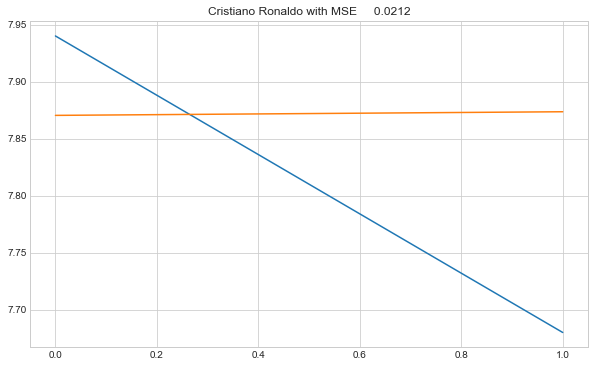

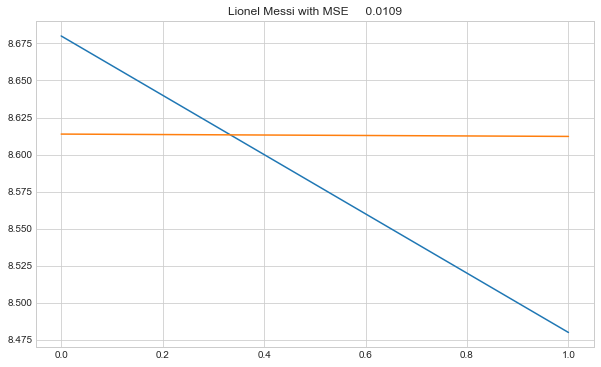

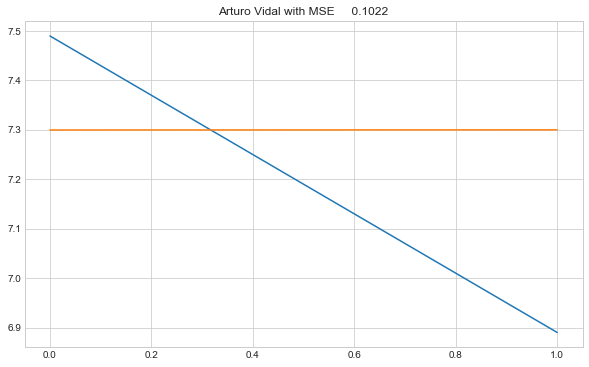

In [132]:
for i in playerList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    
    plt.figure(figsize=(10,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)